In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report

Data Collection and Processing

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [4]:
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

In [5]:
# loading the csv data to a Pandas DataFrame
heart_data=pd.read_csv(url, names=names)

In [32]:
heart_data = heart_data[~heart_data.isin(['?'])]
print(heart_data.loc[280:])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0    130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0    161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0      0.0  

In [33]:
#print 5 rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [34]:
heart_data = heart_data.dropna(axis=0)
print(heart_data.loc[280:])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0    130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0    161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0      0.0    166.0    0.0      1.2   
292  44.0  1.0  4.0     120.0  169.0  0.0      0.0  

In [35]:
#number of rows and columns in dataset
heart_data.shape

(297, 14)

In [36]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 42.9+ KB


In [37]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [38]:
heart_data = heart_data.apply(pd.to_numeric)
print(heart_data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


In [39]:
#stastical methods about data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [40]:
# checking the distribution of target variable
heart_data["class"].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: class, dtype: int64

Spliting the Features And Target

In [41]:
X=heart_data.drop(columns="class",axis=1)
y=heart_data["class"]

In [42]:
print(X)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  
0      3.0  0.0   6.0  
1  

In [43]:
print(y)

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: class, Length: 297, dtype: int64


In [44]:
X.size

3861

Model Training

# **Categorical and Binary Model**

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)

In [46]:
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

In [47]:
def create_model():
    #create
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation = 'softmax'))

    #compile
    adam = Adam(lr = 0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [48]:
model = create_model()

In [49]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
21/21 [==============================] - 2s 2ms/step - loss: 1.5713 - accuracy: 0.3961 
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 1.3337 - accuracy: 0.5604
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2907 - accuracy: 0.5604
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2716 - accuracy: 0.5604
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2564 - accuracy: 0.5604
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2485 - accuracy: 0.5604
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2299 - accuracy: 0.5604
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2227 - accuracy: 0.5604
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2091 - accuracy: 0.5604
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 1.1992 - accuracy: 0.5604
Epoch 11

In [50]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()
Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

277    0
218    0
56     1
89     0
195    1
126    1
200    0
148    0
142    0
285    1
254    0
186    0
53     0
116    0
45     1
238    0
54     1
183    0
228    1
6      1
Name: class, dtype: int64


In [51]:
def create_binary_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [52]:
binary_model = create_binary_model()

In [53]:
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
21/21 [==============================] - 1s 4ms/step - loss: 0.7192 - accuracy: 0.4783
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4879
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5894
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.6039
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5990
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.6184
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.6618
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.6039
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.6280
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.6570
Epoch 11/

In [54]:
categorical_pred = np.argmax(model.predict(X_test), axis=1)
print("Results for categorical model")
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

3/3 [==============================] - 0s 3ms/step
Results for categorical model
0.5333333333333333
              precision    recall  f1-score   support

           0       0.62      0.98      0.76        44
           1       0.40      0.11      0.17        19
           2       0.00      0.00      0.00        15
           3       0.19      0.50      0.27         6
           4       0.00      0.00      0.00         6

    accuracy                           0.53        90
   macro avg       0.24      0.32      0.24        90
weighted avg       0.40      0.53      0.43        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
binary_pred = np.round(binary_model.predict(X_test)).astype(int)
print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

3/3 [==============================] - 0s 3ms/step
Results for Binary Model
0.8333333333333334
              precision    recall  f1-score   support

           0       0.76      0.95      0.85        44
           1       0.94      0.72      0.81        46

    accuracy                           0.83        90
   macro avg       0.85      0.84      0.83        90
weighted avg       0.86      0.83      0.83        90





# **Logistic Regression Model**

Splitting the Data into Training Data and Test Data

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)


In [57]:
LR = LogisticRegression(solver="liblinear")


In [58]:
#training the model using training data

In [60]:
LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

Modal Evaluation

Accuracy Score

In [61]:
#accuracy on training data
X_train_prediction=LR.predict(X_train)
trainig_data_accuracy= accuracy_score(X_train_prediction,y_train)


In [62]:
print("Accuracy On Training Data : ", trainig_data_accuracy*100)

Accuracy On Training Data :  66.18357487922705


In [63]:
#accuracy on testing data
X_test_prediction=LR.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction,y_test)


In [64]:
print("Accuracy On Testing Data : ", testing_data_accuracy*100)

Accuracy On Testing Data :  58.88888888888889


Checking Accuracy using confusion matrix.

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_train_prediction,y_train, labels=[0, 1])

print(cm)

[[99 23]
 [ 3 13]]


Text(0.5, 1.0, 'Confusion Matrix')

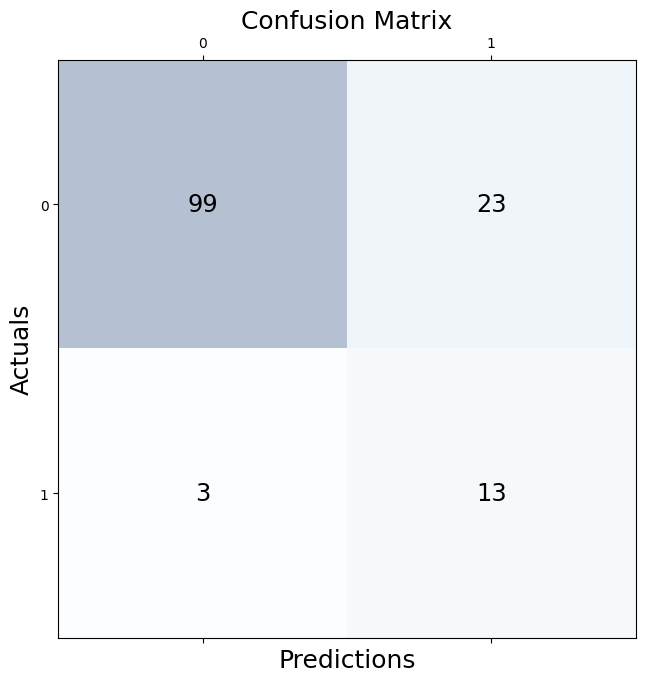

In [66]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [67]:
tn, fp, fn, tp = confusion_matrix(list(X_train_prediction), list(y_train), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 13
True Negative 99
False Positive 23
False Negative 3


In [68]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Training Data : ',acc*100)

Accuracy On Training Data :  81.15942028985508


In [69]:
tn, fp, fn, tp = confusion_matrix(list(X_test_prediction), list(y_test), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 2
True Negative 49
False Positive 4
False Negative 6


In [70]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Testing Data : ',acc*100)

Accuracy On Testing Data :  83.60655737704919


Sensitivity Score

In [71]:
sen = (tp)/(tp+fn)
print('Sensitivity Score is :',sen*100)

Sensitivity Score is : 25.0


Specificity Score

In [72]:
spe = (tn)/(tn+fp)
print('Specificity Score is :',spe*100)

Specificity Score is : 92.45283018867924


Positive Predictive Value

In [73]:
ppv = (tp)/(tp+fp)
print('Positive Predictive Value is :',ppv*100)

Positive Predictive Value is : 33.33333333333333


Negative Predictive Value

In [74]:
npv =(tn)/(tn+fn)
print('Negative Predictive Value is :',npv*100)

Negative Predictive Value is : 89.0909090909091


# **Multinomial** **Naive Bayes Model**

Splitting the Data into Training Data and Test Data





In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=3)

In [76]:
NB=MultinomialNB()


In [78]:
NB.fit(X_train,y_train)

MultinomialNB()

Modal Evaluation

Accuracy Score

In [79]:
X_train_prediction=NB.predict(X_train)
trainig_data_accuracy= accuracy_score(X_train_prediction,y_train)

In [80]:
print("Accuracy On Training Data : ", trainig_data_accuracy*100)

Accuracy On Training Data :  59.49367088607595


In [81]:
X_test_prediction=NB.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction,y_test)

In [82]:
print("Accuracy On Testing Data : ", testing_data_accuracy*100)

Accuracy On Testing Data :  58.333333333333336


Checking Accuracy using confusion matrix.

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_train_prediction,y_train, labels=[0, 1])

print(cm)

[[103  22]
 [ 13  10]]


Text(0.5, 1.0, 'Confusion Matrix')

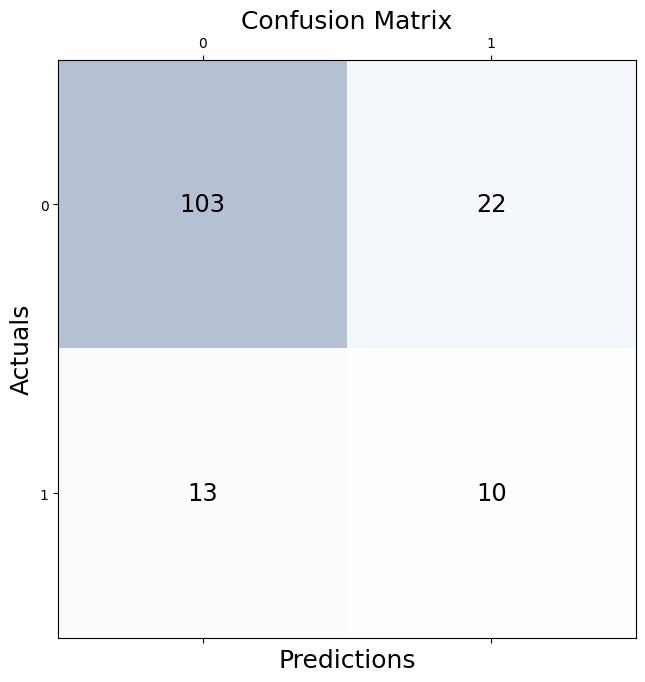

In [84]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [85]:
tn, fp, fn, tp = confusion_matrix(list(X_train_prediction), list(y_train), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 10
True Negative 103
False Positive 22
False Negative 13


In [87]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Training Data : ',acc*100)

Accuracy On Training Data :  76.35135135135135


In [88]:
tn, fp, fn, tp = confusion_matrix(list(X_test_prediction), list(y_test), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 4
True Negative 26
False Positive 4
False Negative 5


In [89]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Testing Data : ',acc*100)

Accuracy On Testing Data :  76.92307692307693


Sensitivity Score

In [90]:
sen = (tp)/(tp+fn)
print('Sensitivity Score is :',sen*100)

Sensitivity Score is : 44.44444444444444


Specificity Score

In [91]:
spe = (tn)/(tn+fp)
print('Specificity Score is :',spe*100)

Specificity Score is : 86.66666666666667


Positive Predictive Value

In [92]:
ppv = (tp)/(tp+fp)
print('Positive Predictive Value is :',ppv*100)

Positive Predictive Value is : 50.0


Negative Predictive Value

In [93]:
npv =(tn)/(tn+fn)
print('Negative Predictive Value is :',npv*100)

Negative Predictive Value is : 83.87096774193549


# **Decision Tree Model**

Splitting the Data into Training Data and Test Data


In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)


In [96]:
dt=DecisionTreeClassifier(max_depth=11)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11)

Modal Evaluation

Accuracy Score

In [97]:
X_train_prediction=dt.predict(X_train)
trainig_data_accuracy= accuracy_score(X_train_prediction,y_train)

In [98]:
print("Accuracy On Training Data : ", trainig_data_accuracy*100)

Accuracy On Training Data :  100.0


In [99]:
X_test_prediction=dt.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction,y_test)

In [100]:
print("Accuracy On Testing Data : ", testing_data_accuracy*100)

Accuracy On Testing Data :  60.0


Checking Accuracy using confusion matrix.

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_train_prediction,y_train, labels=[0, 1])

print(cm)

[[104   0]
 [  0  43]]


Text(0.5, 1.0, 'Confusion Matrix')

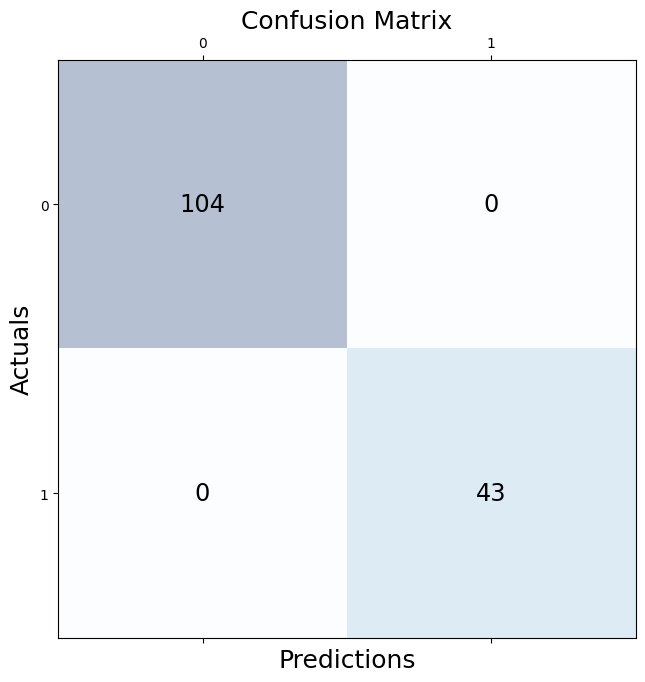

In [102]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [103]:
tn, fp, fn, tp = confusion_matrix(list(X_train_prediction), list(y_train), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 43
True Negative 104
False Positive 0
False Negative 0


In [104]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Training Data : ',acc*100)

Accuracy On Training Data :  100.0


In [105]:
tn, fp, fn, tp = confusion_matrix(list(X_test_prediction), list(y_test), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 6
True Negative 42
False Positive 3
False Negative 9


In [107]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Testing Data : ',acc*100)

Accuracy On Testing Data :  80.0


Sensitivity Score

In [108]:
sen = (tp)/(tp+fn)
print('Sensitivity Score is :',sen*100)

Sensitivity Score is : 40.0


Specificity Score

In [109]:
spe = (tn)/(tn+fp)
print('Specificity Score is :',spe*100)

Specificity Score is : 93.33333333333333


Positive Predictive Value

In [110]:
ppv = (tp)/(tp+fp)
print('Positive Predictive Value is :',ppv*100)

Positive Predictive Value is : 66.66666666666666


Negative Predictive Value

In [111]:
npv =(tn)/(tn+fn)
print('Negative Predictive Value is :',npv*100)

Negative Predictive Value is : 82.35294117647058


# **K Nearest Neighbour Model**

Splitting the Data into Training Data and Test Data


In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)


In [113]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

Modal Evaluation

Accuracy Score

In [114]:
X_train_prediction=knn.predict(X_train)
trainig_data_accuracy= accuracy_score(X_train_prediction,y_train)

In [115]:
print("Accuracy On Training Data : ", trainig_data_accuracy*100)

Accuracy On Training Data :  58.454106280193244


In [116]:
X_test_prediction=knn.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction,y_test)

In [117]:
print("Accuracy On Testing Data : ", testing_data_accuracy*100)

Accuracy On Testing Data :  51.11111111111111


Checking Accuracy using confusion matrix.

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_train_prediction,y_train, labels=[0, 1])

print(cm)

[[98 28]
 [ 5 11]]


Text(0.5, 1.0, 'Confusion Matrix')

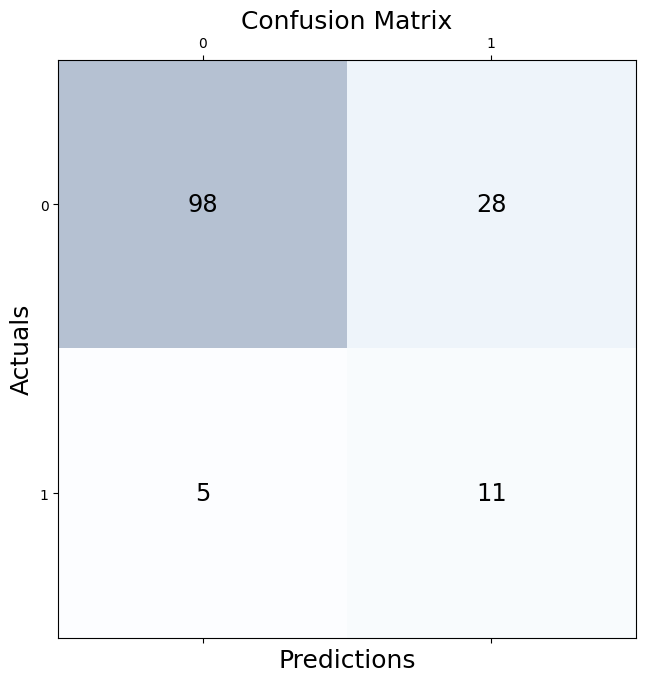

In [119]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [120]:
tn, fp, fn, tp = confusion_matrix(list(X_train_prediction), list(y_train), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 11
True Negative 98
False Positive 28
False Negative 5


In [121]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Training Data : ',acc)

Accuracy On Training Data :  0.7676056338028169


In [122]:
tn, fp, fn, tp = confusion_matrix(list(X_test_prediction), list(y_test), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 2
True Negative 44
False Positive 7
False Negative 10


In [123]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Testing Data : ',acc)

Accuracy On Testing Data :  0.7301587301587301


Sensitivity Score

In [124]:
sen = (tp)/(tp+fn)
print('Sensitivity Score is :',sen*100)

Sensitivity Score is : 16.666666666666664


Specificity Score

In [125]:
spe = (tn)/(tn+fp)
print('Specificity Score is :',spe*100)

Specificity Score is : 86.27450980392157


Positive Predictive Value

In [126]:
ppv = (tp)/(tp+fp)
print('Positive Predictive Value is :',ppv*100)

Positive Predictive Value is : 22.22222222222222


Negative Predictive Value

In [127]:
npv =(tn)/(tn+fn)
print('Negative Predictive Value is :',npv*100)

Negative Predictive Value is : 81.48148148148148


#  **Artifical Neural Network Model**

Splitting the Data into Training data and test data

In [128]:
X_train_nn,X_test_nn,y_train_nn,y_test_nn=train_test_split(X,y,random_state=10,test_size=0.3,shuffle="True")

In [129]:
nn_model = MLPClassifier()

In [130]:
#training of the model using training data
nn_model.fit(X_train_nn,y_train_nn)

MLPClassifier()

Accuracy Score

In [131]:
#Accuracy on training data

X_train_prediction_nn=nn_model.predict(X_train_nn)
training_data_accuracy_nn= accuracy_score(X_train_prediction_nn,y_train_nn)

print("Accuracy on Training Data :",training_data_accuracy_nn*100)

Accuracy on Training Data : 59.42028985507246


In [132]:
#Accuracy on testing data
X_test_prediction_nn=nn_model.predict(X_test_nn)
testing_data_accuracy_nn=accuracy_score(X_test_prediction_nn,y_test_nn)
print("Accuracy on Testing data", testing_data_accuracy_nn*100)

Accuracy on Testing data 65.55555555555556


Checking Accuracy  Confusion Matrix

In [133]:
from sklearn.metrics import confusion_matrix
cm_nn = confusion_matrix(X_train_prediction_nn,y_train_nn, labels=[0, 1])

print(cm_nn)

[[102  29]
 [  0   4]]


Text(0.5, 1.0, 'Confusion Matrix')

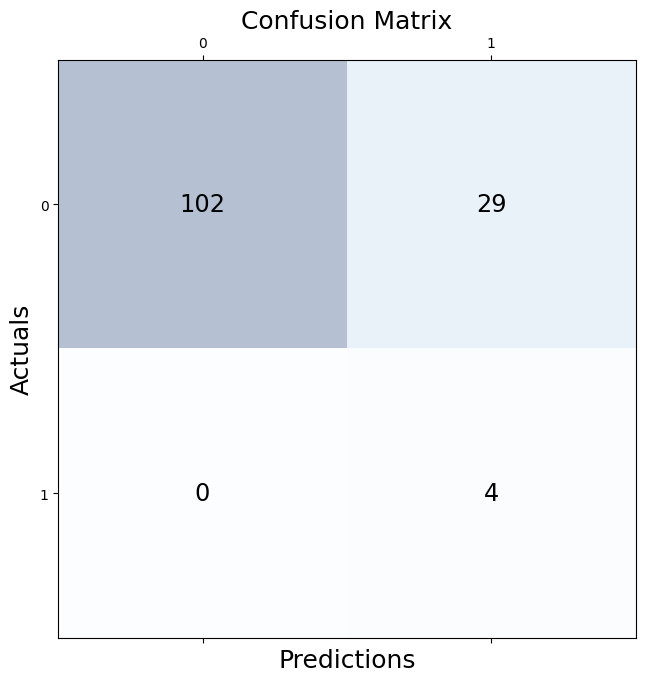

In [134]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_nn, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_nn.shape[0]):
    for j in range(cm_nn.shape[1]):
        ax.text(x=j, y=i,s=cm_nn[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [135]:
tn, fp, fn, tp = confusion_matrix(list(X_train_prediction_nn), list(y_train_nn), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 4
True Negative 102
False Positive 29
False Negative 0


In [136]:
acc_nn = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Training Data : ',acc*100)

Accuracy On Training Data :  73.01587301587301


Sensitivity Score

In [137]:
sen = (tp)/(tp+fn)
print('Sensitivity Score is :',sen*100)

Sensitivity Score is : 100.0


Specificity Score

In [138]:
spe = (tn)/(tn+fp)
print('Specificity Score is :',spe*100)

Specificity Score is : 77.86259541984732


Positive Predictive Value

In [139]:
ppv = (tp)/(tp+fp)
print('Positive Predictive Value is :',ppv*100)

Positive Predictive Value is : 12.121212121212121


Negative Predictive Value

In [140]:
npv =(tn)/(tn+fn)
print('Negative Predictive Value is :',npv*100)

Negative Predictive Value is : 100.0


# **Input Data to Predict Risk**

In [141]:
input_data=(21,1,1,130,210,0,0,200,0,1.8,2,0,0)

#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction0=binary_model.predict(input_data_reshaped)
print("Using Binary Classification Model")
print(prediction0)
if (prediction0[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease')
  print()
prediction1=LR.predict(input_data_reshaped)
print("Using Linear Regression Model")
print(prediction1)
if (prediction1[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease')
  print()
prediction2=NB.predict(input_data_reshaped)
print("Using Multinomial Naive Bayes Model")
print(prediction2)
if (prediction2[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease')
  print()
prediction3=dt.predict(input_data_reshaped)
print("Using Decision Tree Model")
print(prediction3)
if (prediction3[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease')
  print()
prediction4=knn.predict(input_data_reshaped)
print("Using  K Nearest Neighbour Model")
print(prediction4)
if (prediction4[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease')
  print()

prediction5=nn_model.predict(input_data_reshaped)
print("Using Artificial Neural Network Model")
print(prediction5)
if (prediction5[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease')
  print()

final_verdict=int(prediction1+prediction2+prediction3+prediction4+prediction5)
if final_verdict>=3:
     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
     print('***FINAL VERDICT: The person has Heart Disease***')
     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
else:
     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
     print('***FINAL VERDICT: The person does not have Heart Disease***')
     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")


1/1 [==============================] - 0s 59ms/step
Using Binary Classification Model
[[0.01594935]]
The person has Heart Disease

Using Linear Regression Model
[0]
The person does not have Heart Disease

Using Multinomial Naive Bayes Model
[0]
The person does not have Heart Disease

Using Decision Tree Model
[0]
The person does not have Heart Disease

Using  K Nearest Neighbour Model
[0]
The person does not have Heart Disease

Using Artificial Neural Network Model
[0]
The person does not have Heart Disease

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
***FINAL VERDICT: The person does not have Heart Disease***
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
